# Imports

In [1]:
from diffusers import *
import torch
import matplotlib.pyplot as plt

/home/shane/projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


# Constants

In [2]:
model_id = "stabilityai/stable-diffusion-2-1"
inf_steps = 20
# Set GPU device
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
print(device)

cuda


# Generate Images for each scheduler

In [3]:
def img_from_scheduler(scheduler):
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
    pipe = pipe.to("cuda")
    pipe.enable_attention_slicing()
    vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to("cuda")
    pipe.vae = vae
    pipe.scheduler = scheduler.from_config(pipe.scheduler.config)
    prompt = "portrait photo of a old warrior chief, tribal panther make up, blue on red, serious eyes, in front of forest 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta"
    generator = torch.Generator("cuda").manual_seed(60)
    image = pipe(prompt, generator=generator, num_inference_steps=inf_steps).images[0]
    imgplot = plt.imshow(image)
    plt.axis('off')
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 217234.87it/s]
/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


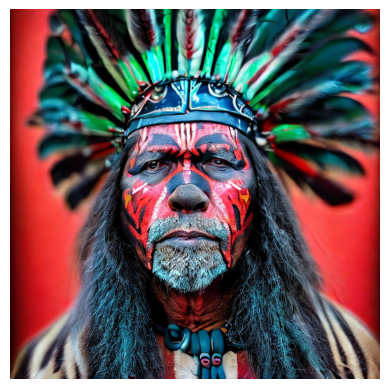

In [4]:
img_from_scheduler(DPMSolverMultistepScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.94it/s]


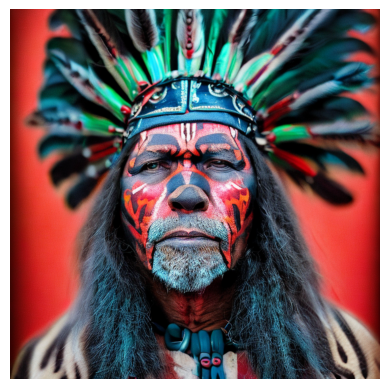

In [5]:
img_from_scheduler(DPMSolverSinglestepScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


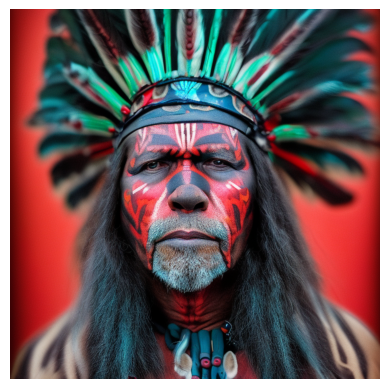

In [6]:
img_from_scheduler(EulerDiscreteScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


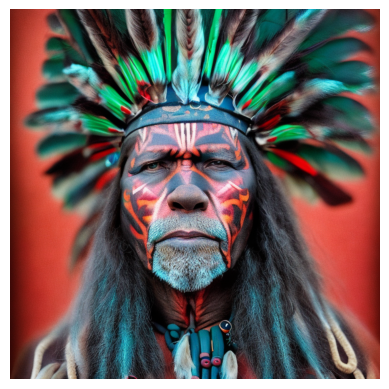

In [7]:
img_from_scheduler(DDIMScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


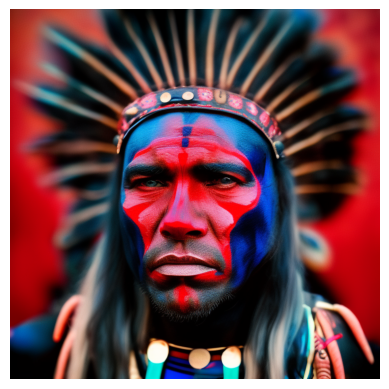

In [8]:
img_from_scheduler(EulerAncestralDiscreteScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.92it/s]


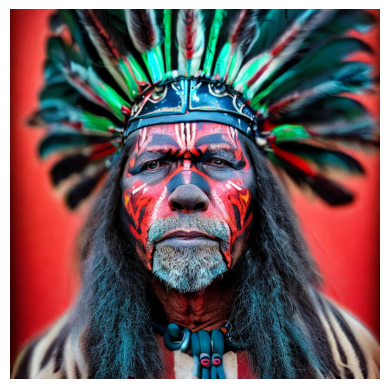

In [9]:
img_from_scheduler(DEISMultistepScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.92it/s]


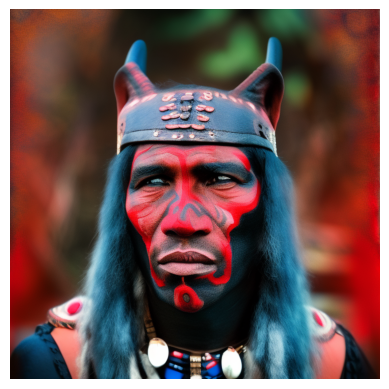

In [10]:
img_from_scheduler(DDPMScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


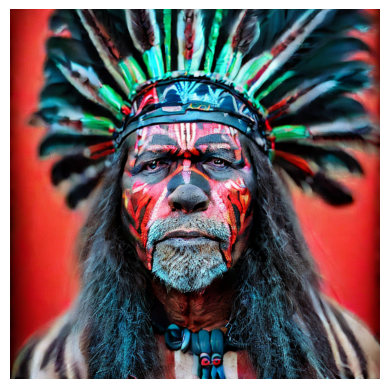

In [11]:
img_from_scheduler(LMSDiscreteScheduler)

100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


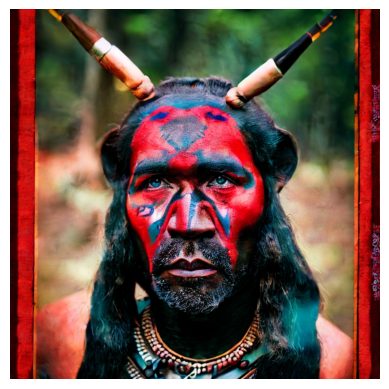

In [12]:
img_from_scheduler(KDPM2AncestralDiscreteScheduler)

100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


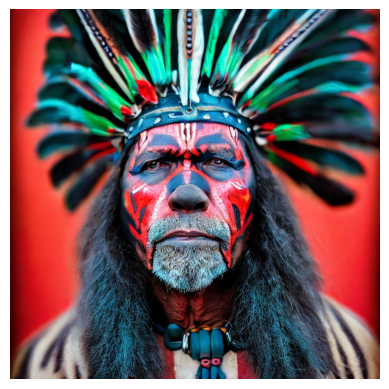

In [13]:
img_from_scheduler(HeunDiscreteScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.82it/s]


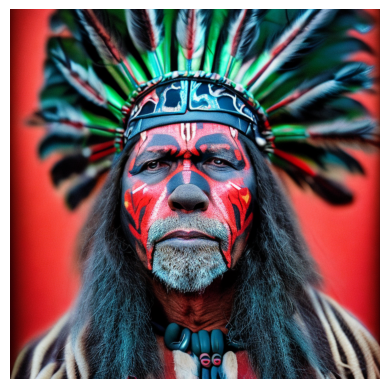

In [14]:
img_from_scheduler(UniPCMultistepScheduler)

100%|██████████| 20/20 [00:10<00:00,  1.83it/s]


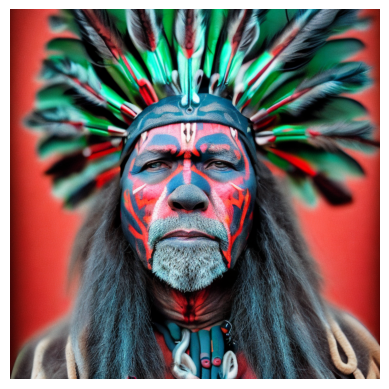

In [15]:
img_from_scheduler(PNDMScheduler)

100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


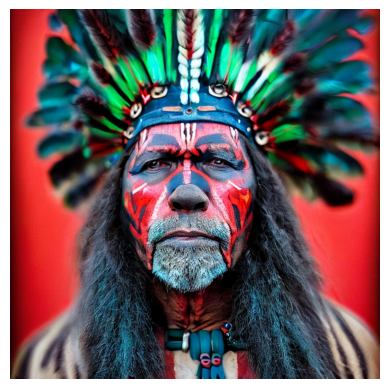

In [16]:
img_from_scheduler(KDPM2DiscreteScheduler)